# Part 1

## 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Create path variable
path = r'C:\Users\justi\Downloads\05-2024 Instacart Basket Analysis_JB\05-2024 Instacart Basket Analysis'

# Import new customers data set from CF's Exercise 4.9 
df = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'ords_prods_custs_merged.pkl'))

In [5]:
# Check dimensions of imported data
df.shape

(9918253, 32)

In [6]:
# Preview the column descriptions of dataframe
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,both
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,both
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,both


In [7]:
# Preview all 32 column names using .info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918253 entries, 0 to 9918252
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int64   
 1   product_name            object  
 2   aisle_id                int64   
 3   department_id           int64   
 4   prices                  float64 
 5   order_id                int64   
 6   user_id                 object  
 7   order_number            int64   
 8   order_day_of_week       int64   
 9   order_hour_of_day       int64   
 10  days_since_prior_order  int64   
 11  add_to_cart_order       int64   
 12  reordered               int64   
 13  price_label             object  
 14  busiest_days            object  
 15  busiest_period_of_day   object  
 16  max_order               int64   
 17  loyalty_flag            object  
 18  average_spend           float64 
 19  spender_flag            object  
 20  Customer_frequency      float64 
 21  frequenc

## 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

#### Regarding personally identifiable information (PII), these are the following columns that have sensitive information and will be removed to create a subset dataframe moving forward:
#### -- first_name
#### -- last_name

#### Further removal of below columns descriptions as they are not needed for future analysis:
#### -- aisle_id
#### -- add_to_cart_order
#### -- date_joined
#### -- _merge

In [8]:
# Create new subset called 'df_clean' removing specified columns
df_clean = df.drop(columns=['first_name', 'last_name', 'aisle_id', 'add_to_cart_order', 'date_joined', '_merge'])

In [9]:
# Check the dimensions of 'df_clean' and validate that 6 columns removed (32-6= 26 columns remain)
df_clean.shape

(9918253, 26)

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918253 entries, 0 to 9918252
Data columns (total 26 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   product_id              int64  
 1   product_name            object 
 2   department_id           int64  
 3   prices                  float64
 4   order_id                int64  
 5   user_id                 object 
 6   order_number            int64  
 7   order_day_of_week       int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  int64  
 10  reordered               int64  
 11  price_label             object 
 12  busiest_days            object 
 13  busiest_period_of_day   object 
 14  max_order               int64  
 15  loyalty_flag            object 
 16  average_spend           float64
 17  spender_flag            object 
 18  Customer_frequency      float64
 19  frequency_flag          object 
 20  gender                  object 
 21  state                   object 

## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. 

## Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions): https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

## Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

#### It looks like Instacart is used the most in South region compared to other (West, Midwest, Northeast)
#### All 4 regions show a trend to have significantly more low spenders (<10) vs. high spenders (>=10)
#### High spenders account for less than 2% of Instacart data

In [11]:
# Create 4 Region lists using Wikipedia info

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [13]:
# Create regional flag column using .loc[['State']] and .isin() functions referencing the region variables created above
# This will make each line item's 'state' be referenced to either 'Northeast', 'Midwest', 'South', or 'West'

df_clean.loc[df['state'].isin(Northeast), 'region'] = 'Northeast'
df_clean.loc[df['state'].isin(Midwest), 'region'] = 'Midwest'
df_clean.loc[df['state'].isin(South), 'region'] = 'South'
df_clean.loc[df['state'].isin(West), 'region'] = 'West'

In [15]:
# Validate that all line items in 'df_clean' has a 'region' variable with all 9918253 line items (df_clean.shape) using .len() function
len(df_clean['region'])

9918253

In [16]:
# Checking frequency count of new 'region' variable and how it ranks highest to lowest using .value_counts() function
df_clean['region'].value_counts(dropna = False)

region
South        3325041
West         2511231
Midwest      2312121
Northeast    1769860
Name: count, dtype: int64

In [19]:
# Create a crosstab (pivot table) to count unique users per 'region' vs. 'spender_flag' variables using .pd.crosstab() function
crosstab_region_spender = pd.crosstab(df_clean['region'], df_clean['spender_flag'], dropna = False)
crosstab_region_spender

spender_flag,High spender,Low spender
region,,
Midwest,39264,2272857
Northeast,31365,1738495
South,64712,3260329
West,46577,2464654


In [29]:
# See 'crosstab_region_spender' columns printed
print(crosstab_region_spender.columns)

Index(['High spender', 'Low spender'], dtype='object', name='spender_flag')


In [30]:
# Above print showed 'region' is not a column name. Correct data preparation for seaborn bar chart with explicit column names
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'High spender': [39264, 31365, 64712, 46577],
    'Low spender': [2272857, 1738495, 3260329, 2464654]
}

df_region_spender = pd.DataFrame(data)

In [33]:
print(df_region_spender)

      region  High spender  Low spender
0    Midwest         39264      2272857
1  Northeast         31365      1738495
2      South         64712      3260329
3       West         46577      2464654


In [32]:
# Melt the 'df_region_spender' from wide to long format. Long format is suitable for seaborn because it makes it easier to specify relationships between variable 
# Each observation forms a row; one column holds the variable names, another column holds the values
# id_vars = specifies that the region column should remain as is (it identifies the rows)
# var_name = sets the name of the new column that will hold the previous column names ('High spender', 'Low spender').
# value_name = sets the name of the new column that will hold the values from the melted columns.

df_melted = pd.melt(df_region_spender, id_vars='region', var_name='spender_flag', value_name='count')

In [34]:
# Double-check that 'df_melted' shows all possible results extracted from 'df_region_spender'
print(df_melted)

      region  spender_flag    count
0    Midwest  High spender    39264
1  Northeast  High spender    31365
2      South  High spender    64712
3       West  High spender    46577
4    Midwest   Low spender  2272857
5  Northeast   Low spender  1738495
6      South   Low spender  3260329
7       West   Low spender  2464654


Text(0.5, 1.0, 'Spending Habits Across 4 US Regions')

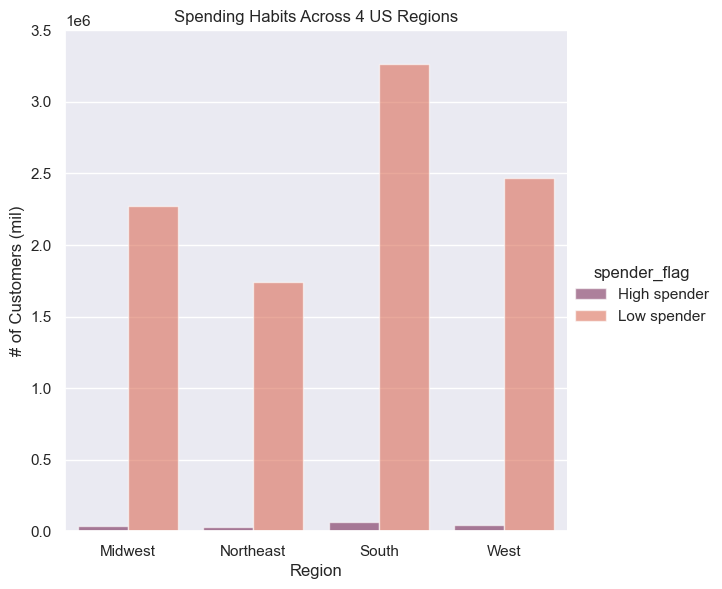

In [42]:
# Now create a bar chart using Seaborn library. Set the theme
sns.set_theme()

# Create the bar chart
bar_region_spender = sns.catplot(
    data=df_melted, kind="bar",
    x="region", y="count", hue="spender_flag", palette="rocket", alpha=.6, height=6
)

# Set the axis labels
bar_region_spender.set_axis_labels("Region", "# of Customers (mil)")

# Customize the y-axis to range from 0 to 3,500,000 in increments of 500,000
plt.ylim(0, 3500000)
plt.yticks(range(0, 3500001, 500000))

# Set the title
plt.title("Spending Habits Across 4 US Regions")

In [43]:
# Export bar chart
bar_region_spender.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_region_spender.png'))

In [46]:
df_clean['frequency_flag'].value_counts(dropna = False)

frequency_flag
Frequent Customer        6956973
Regular customer         2146117
Non_frequent_customer     815163
Name: count, dtype: int64

In [48]:
# Per Exercise 4.8 Grouping Data and Aggregating Variables, 
# flagged 'high spender' for average spend >= 10
# flagged 'low spender' for average spend < 10
df_region_spender['H/L Ratio'] = df_region_spender['High spender'] / df_region_spender['Low spender']
df_region_spender

,region,High spender,Low spender,H/L Ratio
0,Midwest,39264,2272857,0.017275
1,Northeast,31365,1738495,0.018041
2,South,64712,3260329,0.019848
3,West,46577,2464654,0.018898


## 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [49]:
# Create new 'exclusion flag' column using 'max_order' column
df_clean.loc[df_clean['max_order'] < 5, 'activity'] = 'low'
df_clean.loc[df_clean['max_order'] >= 5, 'activity'] = 'high'

In [50]:
# Create a subset dataframe called 'df_clean_low' of customers with orders <5
df_clean_low = df_clean[df_clean['activity'] =='low']

In [51]:
# Check frequency count using .value_counts() function
df_clean_low['activity'].value_counts(dropna = False)

activity
low    438551
Name: count, dtype: int64

In [52]:
# 4% of Instacart data was "low-activity customers"
print(438551/9918253)

0.04421655708923739


In [54]:
# Exporting 4% sample 'df_clean_low' via pkl
df_clean_low.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'low_activity_custs.pkl'))

In [56]:
# Conduct frequency count of "high-activity customers" from main 'df_clean' dataframe
df_clean['activity'].value_counts(dropna=False)

activity
high    9479702
low      438551
Name: count, dtype: int64

In [57]:
# Create a subset dataframe called 'df_clean_high' of customers with orders >=5 
df_clean_high = df_clean[df_clean['activity'] == 'high']
df_clean_high.shape

(9479702, 28)

In [58]:
# Exporting 96% sample 'df_clean_high' via pkl
df_clean_high.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'high_activity_custs.pkl'))

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on:
### (1) age
### (2) income
### (3) certain goods in the “department_id” column
### (4) number of dependents

## You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)



## 6. Create an appropriate visualization to show the distribution of profiles.

## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

#### Answers: 
#### Majority of Instacart orders are from married young adults (<25)
#### Majority of Instacart orders are coming from families making middle income range (40,000- 150,000)
#### There is opportunity for Sales team to target middle income families in Northeast region (least sales in that specific cohort)

### 5.1 Age Profile

In [60]:
# Create new 'age_group' variable with the criteria using 'age' column data and .loc() function:
# Young Adult = 25 years old and under
# Adult = 26-64 years old
# Senior Citizen = 65 years old and above

df_clean.loc[df_clean['age'] <= 25, 'age_group'] = 'Young Adult'
df_clean.loc[(df_clean['age']>25) & (df_clean['age']< 65), 'age_group'] = 'Adult'
df_clean.loc[df_clean['age']>= 65, 'age_group'] = 'Senior Citizen'

In [62]:
# Check frequency count using .value_counts() function
df_clean['age_group'].value_counts()

age_group
Adult             6058855
Senior Citizen    2620487
Young Adult       1238911
Name: count, dtype: int64

In [70]:
# Is there a connection between age and family status in terms of ordering habits? 
# # 'df_clean' dataframe contains <10mil unique orders and age of user who ordered it. Prepare a visualization
# Create a crosstab (pivot table) to count unique users per 'age_group' vs. 'marital_status' variables using .pd.crosstab() function

crosstab_age_status = pd.crosstab(df_clean['age_group'], df_clean['marital_status'], dropna = False)
crosstab_age_status

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult,198094,0,4540489,1320272
Senior Citizen,640174,0,1980313,0
Young Adult,0,481888,463677,293346


In [64]:
# See 'crosstab_age_status' columns printed
print(crosstab_age_status.columns)

Index(['divorced/widowed', 'living with parents and siblings', 'married',
       'single'],
      dtype='object', name='marital_status')


In [65]:
# Above print showed 'age_group' is not a column name. Correct data preparation for seaborn bar chart with explicit column names
data = {
    'age_group': ['Young Adult', 'Adult', 'Senior Citizen'],
    'divorced_widowed': [198094, 640174, 0],
    'living_with_parents_siblings': [0, 0, 481888],
    'married': [4540489, 1980313, 463677],
    'single': [1320272, 0, 293346]
}

df_age_status = pd.DataFrame(data)
print(df_age_status)

        age_group  divorced_widowed  living_with_parents_siblings  married  \
0     Young Adult            198094                             0  4540489   
1           Adult            640174                             0  1980313   
2  Senior Citizen                 0                        481888   463677   

    single  
0  1320272  
1        0  
2   293346  


In [67]:
# Melt the 'df_age_status' from wide to long format. Long format is suitable for seaborn because it makes it easier to specify relationships between variable 
# Each observation forms a row; one column holds the variable names, another column holds the values
# id_vars = specifies that the age_status column should remain as is (it identifies the rows)
# var_name = sets the name of the new column that will hold the previous column names ('Married', '_').
# value_name = sets the name of the new column that will hold the values from the melted columns.

df_melted2 = pd.melt(df_age_status, id_vars='age_group', var_name='marital_status', value_name='count')

In [68]:
# Double-check that 'df_melted2' shows all possible results extracted from 'df_age_status'
print(df_melted2)

         age_group                marital_status    count
0      Young Adult              divorced_widowed   198094
1            Adult              divorced_widowed   640174
2   Senior Citizen              divorced_widowed        0
3      Young Adult  living_with_parents_siblings        0
4            Adult  living_with_parents_siblings        0
5   Senior Citizen  living_with_parents_siblings   481888
6      Young Adult                       married  4540489
7            Adult                       married  1980313
8   Senior Citizen                       married   463677
9      Young Adult                        single  1320272
10           Adult                        single        0
11  Senior Citizen                        single   293346


In [80]:
# Ensure 'age_group' is in the desired order to appear in stacked bar chart
age_group_order = ['Young Adult', 'Adult', 'Senior Citizen']
df_melted2['age_group'] = pd.Categorical(df_melted2['age_group'], categories= age_group_order, ordered=True)

Text(0.5, 1.0, 'Marital Status Distribution Across Age Groups')

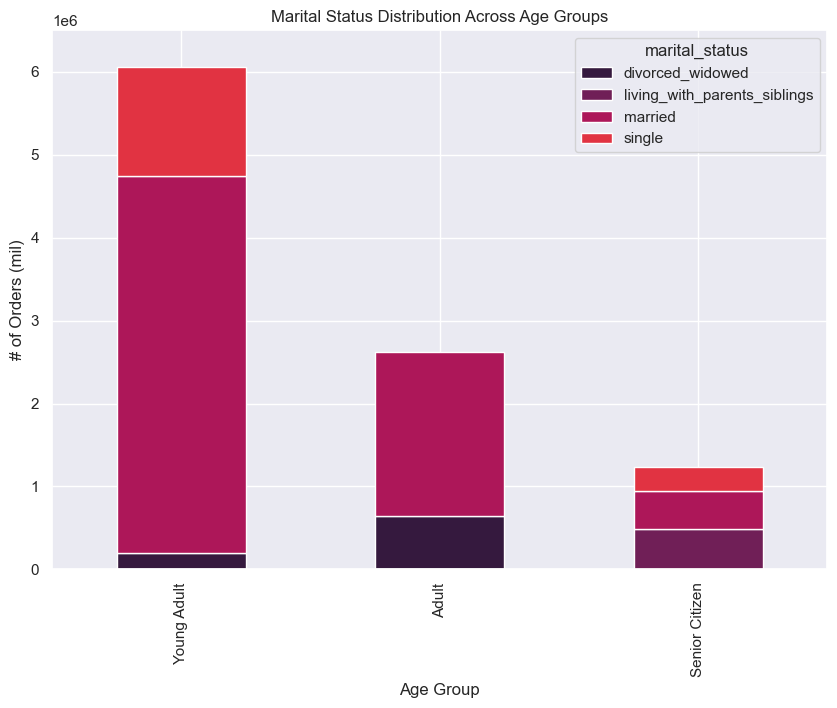

In [82]:
# Now create a stacked bar chart using Seaborn library. Set the theme
sns.set_theme()

# Pivot 'df_melted2' for easier plotting with matplotlib
df_pivot = df_melted2.pivot(index='age_group', columns='marital_status', values='count')

# Create stacked bar chart
stackedbar_age_status = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), color=sns.color_palette("rocket"))

# Customize the y-axis to range from 0 to 6,500,000 in increments of 1,000,000
plt.ylim(0, 6500000)
plt.yticks(range(0, 6500001, 1000000))

# Set axis labels and title
plt.xlabel('Age Group')
plt.ylabel('# of Orders (mil)')
plt.title('Marital Status Distribution Across Age Groups')

In [85]:
# Export stacked bar chart
stackedbar_age_status.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stackedbar_age_status.png'))

In [86]:
# Aggregate mean, min, max for 'age group' and 'days_since_prior_order' usage frequency using .groupby() and .agg() functions
df_clean.groupby('age_group').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order        
                                 mean min max
age_group                                    
Adult                       10.877549   0  30
Senior Citizen              10.823834   0  30
Young Adult                 10.727002   0  30

In [88]:
# Aggregate mean, min, max for for 'age_group' and 'prices' expenditure using .groupby() and .agg() functions
df_clean.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
age_group                              
Adult           11.008128  1.0  99999.0
Senior Citizen  11.617689  1.0  99999.0
Young Adult     10.937010  1.0  99999.0

### 5.2 Income Profile

In [89]:
# Create Income profiling variable called 'income_group'
# Low income = <40,000
# Middle income = 40,000-150,000
# High income = >150,000

df_clean.loc[df_clean['income'] < 40000, 'income_group'] = 'Low income'
df_clean.loc[(df_clean['income'] >= 40000) & (df_clean['income'] < 150000), 'income_group'] = 'Middle income'
df_clean.loc[df_clean['income'] > 150000, 'income_group'] = 'High income'

In [90]:
# Checking frequency count of income_group'
df_clean['income_group'].value_counts()

income_group
Middle income    8121035
High income      1247197
Low income        550021
Name: count, dtype: int64

In [94]:
# Create a crosstab (pivot table) to count unique users per 'income_group' vs. 'region' variables using .pd.crosstab() function
crosstab_income_region = pd.crosstab(df_clean['income_group'], df_clean['region'], dropna = False)
crosstab_income_region

region,Midwest,Northeast,South,West
income_group,,,,
High income,290769,226127,413103,317198
Low income,132264,91798,192278,133681
Middle income,1889088,1451935,2719660,2060352


In [95]:
# See 'crosstab_income_region' columns printed
print(crosstab_income_region.columns)

Index(['Midwest', 'Northeast', 'South', 'West'], dtype='object', name='region')


In [105]:
# Above print showed 'income_group' is not a column name. Correct data preparation for seaborn bar chart with explicit column names
data = {
    'income_group': ['High income', 'Low income', 'Middle income'],
    'Midwest': [290769, 132264, 1889088],
    'Northeast': [226127, 91798, 1451935],
    'South': [413103, 192278, 2719660],
    'West': [317198, 133681, 2060352]
}

df_income_region = pd.DataFrame(data)
print(df_income_region)


    income_group  Midwest  Northeast    South     West
0    High income   290769     226127   413103   317198
1     Low income   132264      91798   192278   133681
2  Middle income  1889088    1451935  2719660  2060352


In [106]:
# Melt the 'df_income_region' from wide to long format. Long format is suitable for seaborn because it makes it easier to specify relationships between variable 
# Each observation forms a row; one column holds the variable names, another column holds the values
# id_vars = specifies that the income_group column should remain as is (it identifies the rows)
# var_name = sets the name of the new column that will hold the previous column names ('Midwest', '_').
# value_name = sets the name of the new column that will hold the values from the melted columns.

df_melted3 = pd.melt(df_income_region, id_vars='income_group', var_name='region', value_name='count')


In [107]:
# Double-check that 'df_melted3' shows all possible results extracted from 'df_income_region'
print(df_melted3)

     income_group     region    count
0     High income    Midwest   290769
1      Low income    Midwest   132264
2   Middle income    Midwest  1889088
3     High income  Northeast   226127
4      Low income  Northeast    91798
5   Middle income  Northeast  1451935
6     High income      South   413103
7      Low income      South   192278
8   Middle income      South  2719660
9     High income       West   317198
10     Low income       West   133681
11  Middle income       West  2060352


In [108]:
# Ensure 'income_group' is in the desired order to appear in stacked bar chart
income_group_order = ['Low income', 'Middle income', 'High income']
df_melted3['income_group'] = pd.Categorical(df_melted3['income_group'], categories= income_group_order, ordered=True)

Text(0.5, 1.0, 'Region Distribution Across Income Groups')

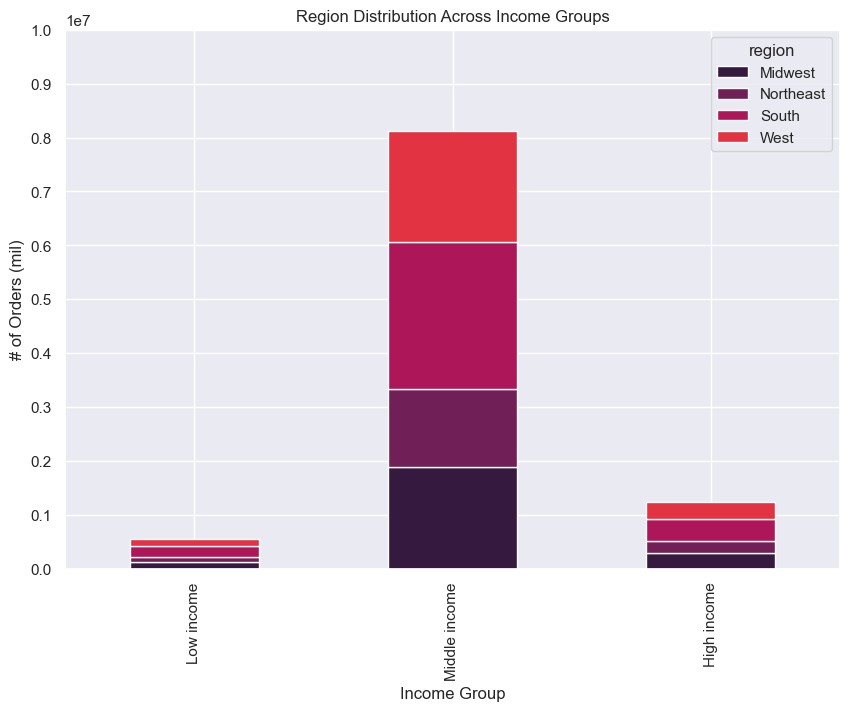

In [110]:
# Now create a stacked bar chart using Seaborn library. Set the theme
sns.set_theme()

# Pivot 'df_melted3' for easier plotting with matplotlib
df_pivot = df_melted3.pivot(index='income_group', columns='region', values='count')

# Create stacked bar chart
stackedbar_income_region = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), color=sns.color_palette("rocket"))

# Customize the y-axis to range from 0 to 10,000,000 in increments of 1,000,000
plt.ylim(0, 10000000)
plt.yticks(range(0, 10000001, 1000000))

# Set axis labels and title
plt.xlabel('Income Group')
plt.ylabel('# of Orders (mil)')
plt.title('Region Distribution Across Income Groups')

In [111]:
# Export stacked bar chart
stackedbar_income_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stackedbar_income_region.png'))

In [92]:
# Aggregate mean, min, max for 'income_group' and 'days_since_prior_order' usage frequency using .groupby() and .agg() functions
df_clean.groupby('income_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order        
                                mean min max
income_group                                
High income                10.686450   0  30
Low income                 11.111078   0  30
Middle income              10.850781   0  30

In [93]:
# Aggregate mean, min, max for for 'income_group' and 'prices' expenditure using .groupby() and .agg() functions
df_clean.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                    mean  min      max
income_group                          
High income    27.773353  1.0  99999.0
Low income      6.495792  1.0     25.0
Middle income   8.924844  1.0  99999.0

### 5.3 Certain goods in the “department_id” column

In [112]:
# Import "departments_wrangled" csv
df_dept = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'))

In [113]:
# View the data to see if anything needs to be changed
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [116]:
#Renaming 'Unnamed: 0' column to 'department_id' using .rename({}) function
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [117]:
# Use .zip() function to turn 'df_dept' dataframe into a data dictionary and call it 'data_dict'
zipped = zip(df_dept['department_id'], df_dept['department'])
data_dict = dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [118]:
# Connect names of 'department' variable to 'department_id' in 'df_clean' dataframe using .map(data_dict) function (essentially a vlookup)
df_clean['department'] = df_clean['department_id'].map(data_dict)

In [120]:
# Check the top 5 results of 'df_clean' master dataframe to validate 'department' names have been added in the far right
df_clean.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,state,age,n_dependants,marital_status,income,region,activity,age_group,income_group,department
0,1,Chocolate Sandwich Cookies,19,5.8,3139998,138,28,6,11,3,...,Minnesota,81,1,married,49620,Midwest,high,Senior Citizen,Middle income,snacks
1,1,Chocolate Sandwich Cookies,19,5.8,1977647,138,30,6,17,20,...,Minnesota,81,1,married,49620,Midwest,high,Senior Citizen,Middle income,snacks
2,1,Chocolate Sandwich Cookies,19,5.8,389851,709,2,0,21,6,...,Vermont,66,2,married,158302,Northeast,high,Senior Citizen,High income,snacks
3,1,Chocolate Sandwich Cookies,19,5.8,652770,764,1,3,13,7,...,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income,snacks
4,1,Chocolate Sandwich Cookies,19,5.8,1813452,764,3,4,17,9,...,Wisconsin,40,3,married,31308,Midwest,low,Adult,Low income,snacks


In [121]:
# Create a new subset dataframe called 'df_dept_ords'. Group departments to calculate frequency of orders using the variables: 'department_id', 'department', count of 'order_id', and sum of 'prices' 
df_dept_ords = df_clean.groupby(['department_id','department'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})

In [122]:
# Rename 'order_id' --> 'count_of_orders' and 'prices'--> 'total_revenue'
df_dept_ords.rename(columns={'order_id': "count_of_orders", 'prices': 'total_revenue'}, inplace=True)

In [124]:
# Validate sum of 'count_of_orders' = 9918253 line items (df_clean.shape)
df_dept_ords['count_of_orders'].sum()

9918253

In [127]:
# Sort 'count_of_orders' from highest to lowest using .sort_values() function
df_dept_ords.sort_values(by=['count_of_orders'], ascending=False, inplace=True)
df_dept_ords

,department_id,department,count_of_orders,total_revenue
3,4,produce,2904708,23173709.1
15,16,dairy eggs,1649746,47177230.1
18,19,snacks,885206,3775201.2
6,7,beverages,822529,6320578.9
0,1,frozen,679320,5254419.8
12,13,pantry,573012,4590912.0
2,3,bakery,359302,2822220.3
14,15,canned goods,328413,2475660.6
19,20,deli,324276,2530023.5
8,9,dry goods pasta,264330,1949475.9


In [132]:
# Dairy eggs department's revenue look suspicious. Create a subset called 'df_dairy_eggs' to investigate
df_dairy_eggs = df_clean[df_clean['department'] == 'dairy eggs']
df_dairy_eggs.head()

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,state,age,n_dependants,marital_status,income,region,activity,age_group,income_group,department
874,9,Light Strawberry Blueberry Yogurt,16,7.0,169443,225,11,4,10,6,...,Montana,76,3,married,69724,West,high,Senior Citizen,Middle income,dairy eggs
875,9,Light Strawberry Blueberry Yogurt,16,7.0,2392292,1414,2,3,23,7,...,Mississippi,57,1,married,154126,South,high,Adult,High income,dairy eggs
876,9,Light Strawberry Blueberry Yogurt,16,7.0,2614966,1414,4,6,17,4,...,Mississippi,57,1,married,154126,South,high,Adult,High income,dairy eggs
877,9,Light Strawberry Blueberry Yogurt,16,7.0,2075205,1414,6,0,11,10,...,Mississippi,57,1,married,154126,South,high,Adult,High income,dairy eggs
878,9,Light Strawberry Blueberry Yogurt,16,7.0,2146818,1414,8,2,10,9,...,Mississippi,57,1,married,154126,South,high,Adult,High income,dairy eggs


In [134]:
# Sort 'prices' in descending order. 
df_dairy_eggs_sorted = df_dairy_eggs.sort_values(by='prices', ascending=False)
df_dairy_eggs_sorted

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,state,age,n_dependants,marital_status,income,region,activity,age_group,income_group,department
6670869,33664,2 % Reduced Fat Milk,16,99999.0,1842539,58405,16,0,16,30,...,Florida,21,2,living with parents and siblings,93218,South,high,Young Adult,Middle income,dairy eggs
6670822,33664,2 % Reduced Fat Milk,16,99999.0,1075660,44570,2,1,19,30,...,Virginia,64,2,married,164457,South,low,Adult,High income,dairy eggs
6670815,33664,2 % Reduced Fat Milk,16,99999.0,420339,43360,5,1,10,14,...,Florida,67,3,married,149199,South,high,Senior Citizen,Middle income,dairy eggs
6670816,33664,2 % Reduced Fat Milk,16,99999.0,2912515,43360,7,2,9,28,...,Florida,67,3,married,149199,South,high,Senior Citizen,Middle income,dairy eggs
6670817,33664,2 % Reduced Fat Milk,16,99999.0,1947300,44089,32,1,15,24,...,New Jersey,74,2,married,124759,Northeast,high,Senior Citizen,Middle income,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030400,11512,Honey Yoghurt,16,1.0,590924,42658,19,6,21,12,...,Nebraska,27,0,single,45866,Midwest,high,Adult,Middle income,dairy eggs
2030399,11512,Honey Yoghurt,16,1.0,2153031,42658,18,1,12,5,...,Nebraska,27,0,single,45866,Midwest,high,Adult,Middle income,dairy eggs
2030398,11512,Honey Yoghurt,16,1.0,3055385,42658,15,5,8,10,...,Nebraska,27,0,single,45866,Midwest,high,Adult,Middle income,dairy eggs
2030397,11512,Honey Yoghurt,16,1.0,2979326,42658,13,5,15,19,...,Nebraska,27,0,single,45866,Midwest,high,Adult,Middle income,dairy eggs


In [136]:
# Use .str.contains() function to filter to milk products. It is apparent that 2% milk = 99999. 
df_milk = df_dairy_eggs_sorted[df_dairy_eggs_sorted['product_name'].str.contains('milk', case=False, na=False)]
df_milk

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,state,age,n_dependants,marital_status,income,region,activity,age_group,income_group,department
6670869,33664,2 % Reduced Fat Milk,16,99999.0,1842539,58405,16,0,16,30,...,Florida,21,2,living with parents and siblings,93218,South,high,Young Adult,Middle income,dairy eggs
6670822,33664,2 % Reduced Fat Milk,16,99999.0,1075660,44570,2,1,19,30,...,Virginia,64,2,married,164457,South,low,Adult,High income,dairy eggs
6670815,33664,2 % Reduced Fat Milk,16,99999.0,420339,43360,5,1,10,14,...,Florida,67,3,married,149199,South,high,Senior Citizen,Middle income,dairy eggs
6670816,33664,2 % Reduced Fat Milk,16,99999.0,2912515,43360,7,2,9,28,...,Florida,67,3,married,149199,South,high,Senior Citizen,Middle income,dairy eggs
6670817,33664,2 % Reduced Fat Milk,16,99999.0,1947300,44089,32,1,15,24,...,New Jersey,74,2,married,124759,Northeast,high,Senior Citizen,Middle income,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212337,6962,Organic Whole Milk Plain Kefir,16,1.0,1261202,24135,8,4,10,4,...,Hawaii,25,1,married,31323,West,high,Young Adult,Low income,dairy eggs
1212336,6962,Organic Whole Milk Plain Kefir,16,1.0,2956486,24135,7,0,8,22,...,Hawaii,25,1,married,31323,West,high,Young Adult,Low income,dairy eggs
1212335,6962,Organic Whole Milk Plain Kefir,16,1.0,652748,23898,5,5,19,30,...,Ohio,19,3,living with parents and siblings,96794,Midwest,high,Young Adult,Middle income,dairy eggs
1212334,6962,Organic Whole Milk Plain Kefir,16,1.0,55262,23878,53,4,13,3,...,Florida,35,1,married,72360,South,high,Adult,Middle income,dairy eggs


In [138]:
# Find the median price of milk products
median_milk = df_milk['prices'].median()
median_milk

9.1

In [139]:
# Update outlier price 99999 to median price of 9.1 to master dataframe 'df_clean'
df_clean.loc[(df_clean['department'] == 'dairy eggs') & (df_clean['prices'] == 99999), 'prices'] = 9.1

In [144]:
# View if 2% milk (product_id 33664) has been updated
df_milk_updated = df_clean[df_clean['product_id'] == 33664]
df_milk_updated

,product_id,product_name,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,...,state,age,n_dependants,marital_status,income,region,activity,age_group,income_group,department
6670728,33664,2 % Reduced Fat Milk,16,9.1,183964,873,3,0,10,7,...,Colorado,64,3,married,290220,West,high,Adult,High income,dairy eggs
6670729,33664,2 % Reduced Fat Milk,16,9.1,1851256,873,4,6,12,13,...,Colorado,64,3,married,290220,West,high,Adult,High income,dairy eggs
6670730,33664,2 % Reduced Fat Milk,16,9.1,1915696,1893,1,5,17,7,...,Colorado,23,3,married,348829,West,high,Young Adult,High income,dairy eggs
6670731,33664,2 % Reduced Fat Milk,16,9.1,2763293,1893,2,4,16,13,...,Colorado,23,3,married,348829,West,high,Young Adult,High income,dairy eggs
6670732,33664,2 % Reduced Fat Milk,16,9.1,2564805,1893,4,1,17,30,...,Colorado,23,3,married,348829,West,high,Young Adult,High income,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6670867,33664,2 % Reduced Fat Milk,16,9.1,1129338,58405,13,1,10,29,...,Florida,21,2,living with parents and siblings,93218,South,high,Young Adult,Middle income,dairy eggs
6670868,33664,2 % Reduced Fat Milk,16,9.1,190064,58405,15,5,17,26,...,Florida,21,2,living with parents and siblings,93218,South,high,Young Adult,Middle income,dairy eggs
6670869,33664,2 % Reduced Fat Milk,16,9.1,1842539,58405,16,0,16,30,...,Florida,21,2,living with parents and siblings,93218,South,high,Young Adult,Middle income,dairy eggs
6670870,33664,2 % Reduced Fat Milk,16,9.1,245547,58599,18,0,21,6,...,Wyoming,33,2,married,129483,West,high,Adult,Middle income,dairy eggs


In [179]:
# Retrigger 'df_dept_ords'. Group departments to calculate frequency of orders using the variables: 'department_id', 'department', count of 'order_id', and sum of 'prices'
# Sort by 'orders' highest to lowest
df_dept_ords = df_clean.groupby(['department_id','department'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_dept_ords.sort_values(by=['order_id'], ascending=False, inplace=True)
df_dept_ords

,department_id,department,order_id,prices
3,4,produce,2904708,23173709.1
15,16,dairy eggs,1649746,32778684.5
18,19,snacks,885206,3775201.2
6,7,beverages,822529,6320578.9
0,1,frozen,679320,5254419.8
12,13,pantry,573012,4590912.0
2,3,bakery,359302,2822220.3
14,15,canned goods,328413,2475660.6
19,20,deli,324276,2530023.5
8,9,dry goods pasta,264330,1949475.9


C:\Users\justi\AppData\Local\Temp\ipykernel_160\3452753164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_dept_ords = sns.catplot(x='order_id', y='department', data = df_dept_ords, height=6, kind='bar', palette="rocket")


Text(0.5, 1.0, 'Frequently Ordered Goods By Department')

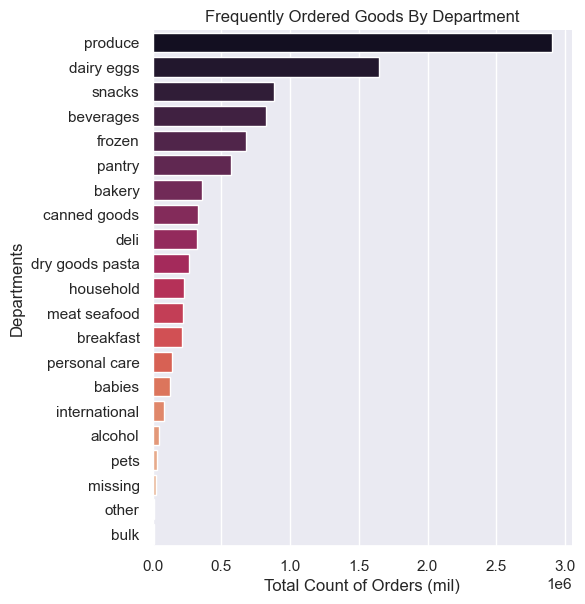

In [183]:
# Make a bar chart showing department ranking in frequency of product ordered highest to lowest
bar_dept_ords = sns.catplot(x='order_id', y='department', data = df_dept_ords, height=6, kind='bar', palette="rocket")
bar_dept_ords.set_axis_labels("Total Count of Orders (mil)", "Departments")
plt.title("Frequently Ordered Goods By Department")

In [184]:
# Export bar chart
bar_dept_ords.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_dept_ords.png'))

In [147]:
# Sort by 'prices' highest to lowest
df_dept_ords.sort_values(by=['prices'], ascending=False, inplace=True)
df_dept_ords

,department_id,department,order_id,prices
15,16,dairy eggs,1649746,32778684.5
3,4,produce,2904708,23173709.1
6,7,beverages,822529,6320578.9
0,1,frozen,679320,5254419.8
12,13,pantry,573012,4590912.0
18,19,snacks,885206,3775201.2
11,12,meat seafood,217169,3540239.9
2,3,bakery,359302,2822220.3
19,20,deli,324276,2530023.5
14,15,canned goods,328413,2475660.6


C:\Users\justi\AppData\Local\Temp\ipykernel_160\118428873.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_dept_rev = sns.catplot(x='prices', y='department', data = df_dept_ords, height=6, kind='bar', palette="rocket")


Text(0.5, 1.0, "Department's Total Revenue")

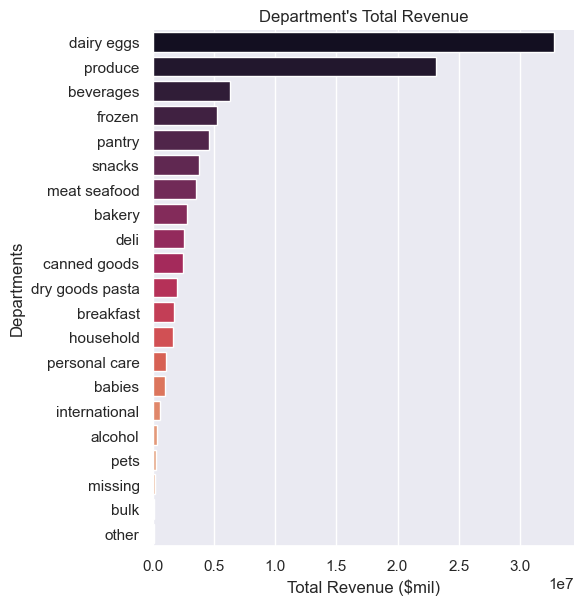

In [154]:
# Make a bar chart showing department ranking in revenue highest to lowest
bar_dept_rev = sns.catplot(x='prices', y='department', data = df_dept_ords, height=6, kind='bar', palette="rocket")
bar_dept_rev.set_axis_labels("Total Revenue ($mil)", "Departments")
plt.title("Department's Total Revenue")

In [155]:
# Export bar chart
bar_dept_rev.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_dept_rev.png'))

In [156]:
# Make a subset dataframe called 'df_dept_loyalty' to assess how often regular vs. loyal customers are buying grouping by department and aggregating the count of 'order_id' and sum of 'prices'
df_dept_loyalty = df_clean.groupby(['department_id','department', 'loyalty_flag'], as_index=False).agg({'order_id': 'count', 'prices': 'sum'})
df_dept_loyalty.sort_values(by=['order_id'], ascending=False, inplace=True)
df_dept_loyalty

,department_id,department,loyalty_flag,order_id,prices
11,4,produce,Regular customer,1414117,11294455.1
9,4,produce,Loyal customer,961128,7633635.5
47,16,dairy eggs,Regular customer,797003,17305842.0
45,16,dairy eggs,Loyal customer,557422,8920362.5
10,4,produce,New customer,529463,4245618.5
...,...,...,...,...,...
29,10,bulk,Regular customer,4845,40458.4
27,10,bulk,Loyal customer,4099,33947.2
3,2,other,Loyal customer,3096,19995.4
4,2,other,New customer,2337,17195.1


In [157]:
# Rename 'order_id' --> 'count_of_orders' and 'prices'--> 'total_revenue'
df_dept_loyalty.rename(columns={'order_id': "count_of_orders", 'prices': 'total_revenue'}, inplace=True)

In [173]:
# Create a new subset dataframe called 'df_dept_top3' to drill in what is loyalty distribution in Top 3 departments: Dairy eggs (16), Produce (4), Beverage (7)
df_dept_top3 = df_dept_loyalty[df_dept_loyalty['department_id'].isin([16, 4, 7])]

Text(0.5, 1.0, 'Distribution of Customer Type in Top 3 Departments')

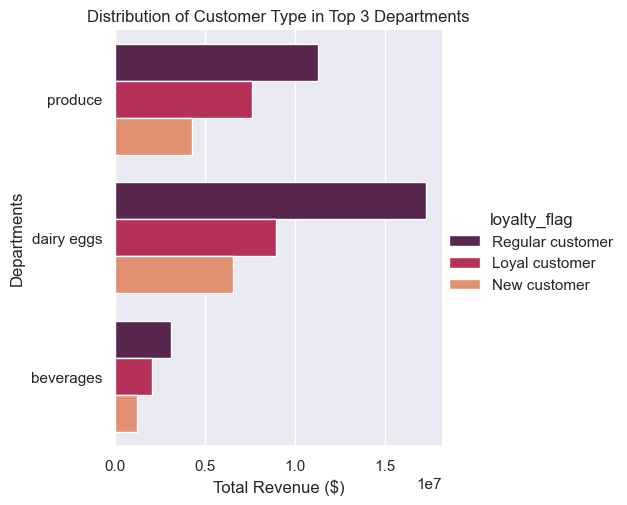

In [174]:
# Create a bar chart using 'df_dept_top3' as the data source
bar_top3 = sns.catplot(x='total_revenue', y='department' , data = df_dept_top3, kind='bar', hue='loyalty_flag', palette='rocket')
bar_top3.set_axis_labels("Total Revenue ($)", "Departments")
plt.title('Distribution of Customer Type in Top 3 Departments')

In [176]:
# Export bar chart
bar_top3.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_top3.png'))

In [177]:
# Aggregate mean, min, max for 'loyalty_flag' and 'days_since_prior_order' usage frequency using .groupby() and .agg() functions
df_clean.groupby('loyalty_flag').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order        
                                   mean min max
loyalty_flag                                   
Loyal customer                 6.032689   0  30
New customer                  16.050914   0  30
Regular customer              11.932657   0  30

In [178]:
# Aggregate mean, min, max for for 'loyalty_flag' and 'prices' expenditure using .groupby() and .agg() functions
df_clean.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices              
                      mean  min      max
loyalty_flag                            
Loyal customer    9.118029  1.0  14900.0
New customer      9.966796  1.0  14900.0
Regular customer  9.990664  1.0  14900.0

### 5.4 Number of dependents

In [191]:
# Create dependent_group profiling variable
df_clean.loc[df_clean['n_dependants'] > 0, 'dependent_group'] = 'has dependents' 
df_clean.loc[df_clean['n_dependants'] == 0, 'dependent_group'] = 'no dependents'

In [192]:
# Check the frequency count
df_clean['dependent_group'].value_counts()

dependent_group
has dependents    7466367
no dependents     2451886
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Dependents')

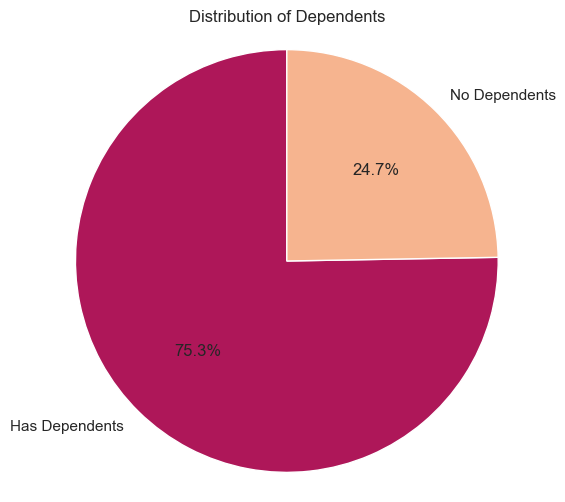

In [198]:
# Create pie chart to compare the 2 groups from 'df_clean'

# Data for the pie chart
labels = ['Has Dependents', 'No Dependents']
sizes = [7466367, 2451886]

# Colors for the pie chart
colors = ['#ae1759','#f6b48f']

# Create the pie chart
pie_dependents = plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

# Set the title
plt.title('Distribution of Dependents')

In [199]:
# Export pie chart
pie_dependents.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'pie_dependents.png'))

In [200]:
# Aggregate mean, min, max for 'dependent_group' and 'days_since_prior_order' usage frequency using .groupby() and .agg() functions
df_clean.groupby('dependent_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order        
                                  mean min max
dependent_group                               
has dependents               10.839307   0  30
no dependents                10.860525   0  30

In [201]:
# Aggregate mean, min, max for for 'dependent_group' and 'prices' expenditure using .groupby() and .agg() functions
df_clean.groupby('dependent_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                     mean  min      max
dependent_group                        
has dependents   9.689487  1.0  14900.0
no dependents    9.766696  1.0  14900.0

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

#### Sales team
#### Key question 1: What are the busiest days of the week and hours of the day are in order to schedule ads at and when there are fewer orders.

#### Answer: 
#### Most busy: 0= Saturday, 1=Sunday (weekend)
#### Average busy: 6= Friday, 5= Thursday, 2= Monday
#### Least busy: 3= Tuesday, 4= Wednesday (middle of the week)
#### Most orders occur on the weekend (Saturday and Sunday)
#### Schedule ads in the middle of the week to boost more sales (Tuesday and Wednesday)


#### Most orders happen between 10am- 3pm (order count above 80,000)
#### Most stores are closed and people are sleeping between midnight- 6am (order count below 10,000)
#### Schedule ads for goods in popular depts: produce, dairy egg, and beverages between 7am-9am to reward early birds (average orders)

In [187]:
# What is the busiest days of the week? (to schedule ads on the unpopular days)
# 0= Saturday, 1=Sunday (weekend)
# 6= Friday, 5= Thursday, 2= Monday
# 3= Tuesday, 4= Wednesday (middle of the week)
# Most orders occur on the weekend (Saturday and Sunday)
# Schedule ads in the middle of the week to boost more sales (Tuesday and Wednesday)
df_clean['order_day_of_week'].value_counts(dropna = False)

order_day_of_week
0    1894196
1    1729956
6    1382396
5    1291406
2    1286645
3    1176810
4    1156844
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x12594c41690>,
 [Text(0, 0, 'Saturday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Tuesday'),
  Text(4, 0, 'Wednesday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

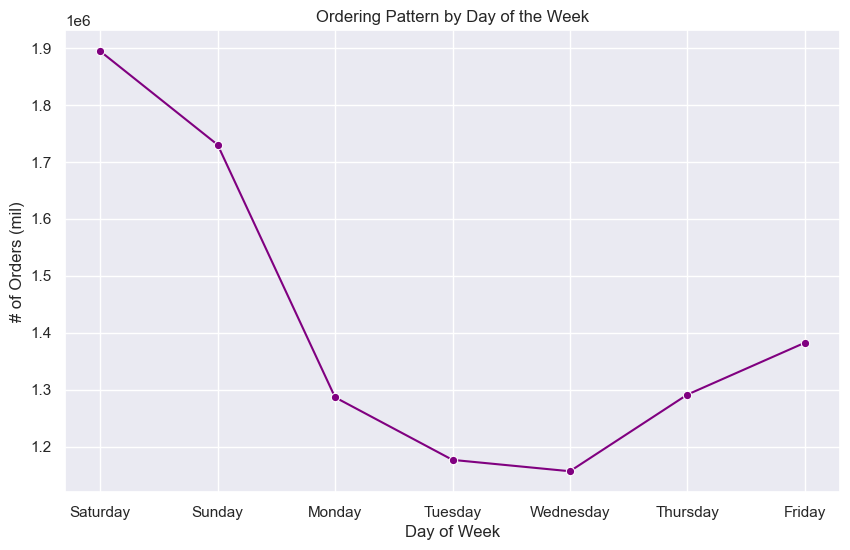

In [220]:
# Data for the line chart
order_day_of_week = {
    0: 1894196,
    1: 1729956,
    6: 1382396,
    5: 1291406,
    2: 1286645,
    3: 1176810,
    4: 1156844
}

# Convert the data to a dataframe for seaborn
df_order_day_of_week = pd.DataFrame(list(order_day_of_week.items()), columns=['Day of Week', 'Number of Orders'])

# Create the line chart
line_busy_days = plt.figure(figsize=(10, 6))
sns.lineplot(x='Day of Week', y='Number of Orders', data=df_order_day_of_week, marker='o', color='purple')

# Set the axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('# of Orders (mil)')
plt.title('Ordering Pattern by Day of the Week')

# Set custom labels for x-axis based on provided mapping
plt.xticks(ticks=range(len(order_day_of_week)), labels=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [221]:
# Export line chart
line_busy_days.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_busy_days.png'))

In [188]:
# What is the busiest hours of the day are? (to schedule ads on unpopular days)
df_clean['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    847433
11    834539
14    824237
13    819415
15    811711
12    806657
16    772746
9     749590
17    636644
8     530095
18    500081
19    384715
20    296474
7     275188
21    246002
22    194143
23    121172
6      87668
0      66104
1      34377
5      26379
2      20972
4      16846
3      15065
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Orders by Hour of the Day')

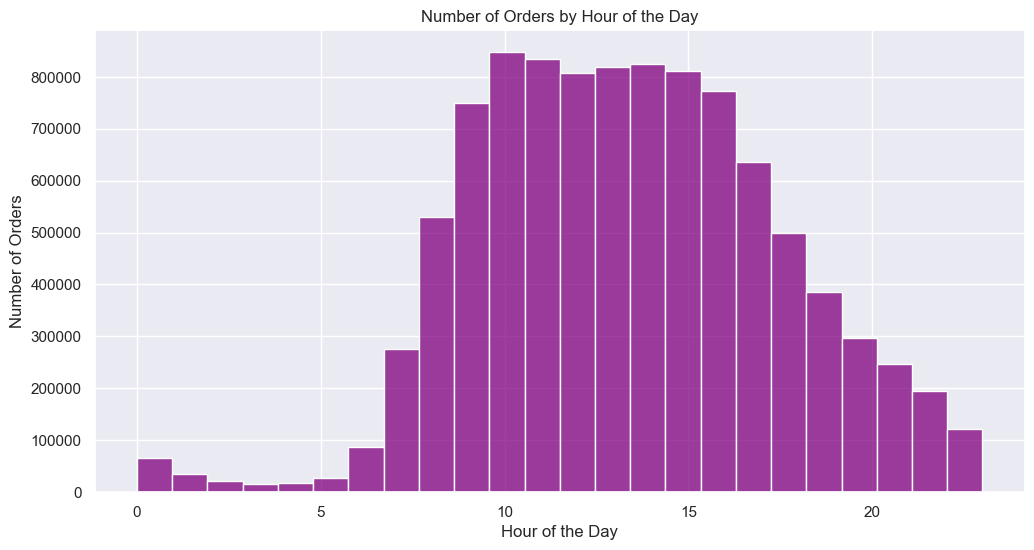

In [225]:
# Data for the histogram
order_hour_of_day = {
    10: 847433, 11: 834539, 14: 824237, 13: 819415, 15: 811711, 12: 806657, 16: 772746, 
    9: 749590, 17: 636644, 8: 530095, 18: 500081, 19: 384715, 20: 296474, 7: 275188, 
    21: 246002, 22: 194143, 23: 121172, 6: 87668, 0: 66104, 1: 34377, 5: 26379, 2: 20972, 
    4: 16846, 3: 15065
}

# Convert the data to a DataFrame for seaborn
df_order_hour_of_day = pd.DataFrame(list(order_hour_of_day.items()), columns=['Hour of Day', 'Number of Orders'])

# Create the histogram
histogram_busy_hours = plt.figure(figsize=(12, 6))
sns.histplot(df_order_hour_of_day, x='Hour of Day', weights='Number of Orders', bins=24, kde=False, color='purple')

# Set the axis labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of the Day')

In [226]:
# Export histogram
histogram_busy_hours.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'histogram_busy_hours.png'))

#### Instacart Customer
#### Key Question 2: They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

#### Answer: 10am- 3pm is window of revenue most camputed. 


In [229]:
# Create subset dataframe to calculate sum of 'prices' and 'order_hour_of_day' using .groupby() and .sum() functions
sum_prices_by_hour = df_clean.groupby('order_hour_of_day')['prices'].sum().reset_index()
sum_prices_by_hour

,order_hour_of_day,prices
0,0,619908.7
1,1,357365.2
2,2,251925.7
3,3,162577.0
4,4,161603.6
5,5,251561.0
6,6,909136.2
7,7,2661715.8
8,8,5007949.8
9,9,7182626.1


In [231]:
# Sort the results in descending order
sum_prices_by_hour_sorted = sum_prices_by_hour.sort_values(by='prices', ascending=False)
sum_prices_by_hour_sorted

,order_hour_of_day,prices
10,10,8185437.8
15,15,8182666.4
16,16,8022655.2
11,11,8004275.6
14,14,7850665.3
12,12,7801367.9
13,13,7725601.1
9,9,7182626.1
17,17,6252901.8
8,8,5007949.8


Text(0.5, 1.0, 'Hour of the Day Contribution to Revenue')

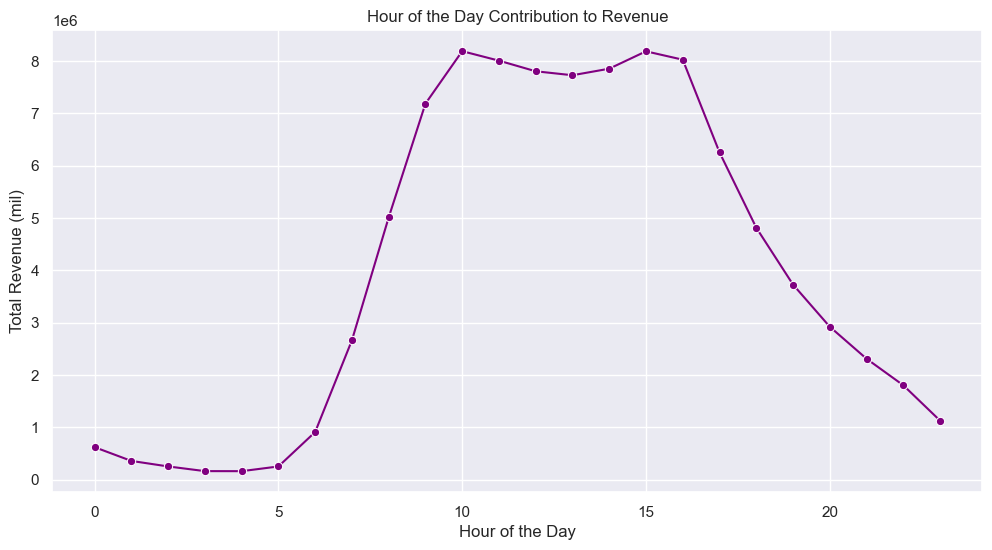

In [237]:
# Data for the line chart
data = {
    'order_hour_of_day': [10, 15, 16, 11, 14, 12, 13, 9, 17, 8, 18, 19, 20, 7, 21, 22, 23, 6, 0, 1, 2, 5, 3, 4],
    'prices': [8185437.8, 8182666.4, 8022655.2, 8004275.6, 7850665.3, 7801367.9, 7725601.1, 7182626.1, 
               6252901.8, 5007949.8, 4813440.2, 3726245.7, 2920846.2, 2661715.8, 2309546.7, 1802716.7, 
               1127355.1, 909136.2, 619908.7, 357365.2, 251925.7, 251561.0, 162577.0, 161603.6]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Create the line chart
line_hour_rev = plt.figure(figsize=(12, 6))
sns.lineplot(x='order_hour_of_day', y='prices', data=df, marker='o', color='purple')

# Set the axis labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue (mil)')
plt.title('Hour of the Day Contribution to Revenue')


In [238]:
# Export line chart
line_hour_rev.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'line_hour_rev.png'))

#### Sales team
##### Key Question 3: Instacart has a lot of products with different price tags. Similar price range groupings = low, mid, high, what is significance?

#### Answer: Calculated 'price_label' in CF's Exercise 4.7
#### Low-range products are >= 5
#### Mid-range products are between 5-15
#### High-reange products are greater than 15
#### Mid-range is the most bought price range in all the 4 US regions. Schedule ads about buying mid-range products to all regions during less busy days of Tuesdays- Wednesdays to boost sales.

In [202]:
# Creating crosstab for region and price_label
region_pricelabel = pd.crosstab(df_clean['region'], df_clean['price_label'], dropna = False)

In [204]:
# Checking crosstab
region_pricelabel

price_label,High-range product,Low-range product,Mid-range product
region,,,
Midwest,29540,720757,1561824
Northeast,22822,555625,1191413
South,42751,1038687,2243603
West,32630,785074,1693527


In [208]:
# Correct data preparation for seaborn bar chart with explicit column names
data = {
    'price_label': ['High-range product', 'Low-range product', 'Mid-range product'],
    'Midwest': [29540, 720757, 1561824],
    'Northeast': [22822, 555625, 1191413],
    'South': [42751, 1038687, 2243603],
    'West': [32630, 785074, 1693527]
}

df_pricelabel_region = pd.DataFrame(data)
print(df_pricelabel_region)

          price_label  Midwest  Northeast    South     West
0  High-range product    29540      22822    42751    32630
1   Low-range product   720757     555625  1038687   785074
2   Mid-range product  1561824    1191413  2243603  1693527


In [209]:
# Melt the 'df_pricelabel_region' from wide to long format. Long format is suitable for seaborn because it makes it easier to specify relationships between variable 
# Each observation forms a row; one column holds the variable names, another column holds the values
# id_vars = specifies that the price_label column should remain as is (it identifies the rows)
# var_name = sets the name of the new column that will hold the previous column names ('Midwest', '_').
# value_name = sets the name of the new column that will hold the values from the melted columns.

df_melted4 = pd.melt(df_pricelabel_region, id_vars='price_label', var_name='region', value_name='count')

# Double-check that 'df_melted3' shows all possible results extracted from 'df_pricelabel_region'
print(df_melted4)

           price_label     region    count
0   High-range product    Midwest    29540
1    Low-range product    Midwest   720757
2    Mid-range product    Midwest  1561824
3   High-range product  Northeast    22822
4    Low-range product  Northeast   555625
5    Mid-range product  Northeast  1191413
6   High-range product      South    42751
7    Low-range product      South  1038687
8    Mid-range product      South  2243603
9   High-range product       West    32630
10   Low-range product       West   785074
11   Mid-range product       West  1693527


In [210]:
# Ensure 'price_label' is in the desired order to appear in stacked bar chart
price_order = ['Low-range product', 'Mid-range product', 'High-range product']
df_melted4['price_label'] = pd.Categorical(df_melted4['price_label'], categories= price_order, ordered=True)

Text(0.5, 1.0, 'Region Distribution Across Price Groupings')

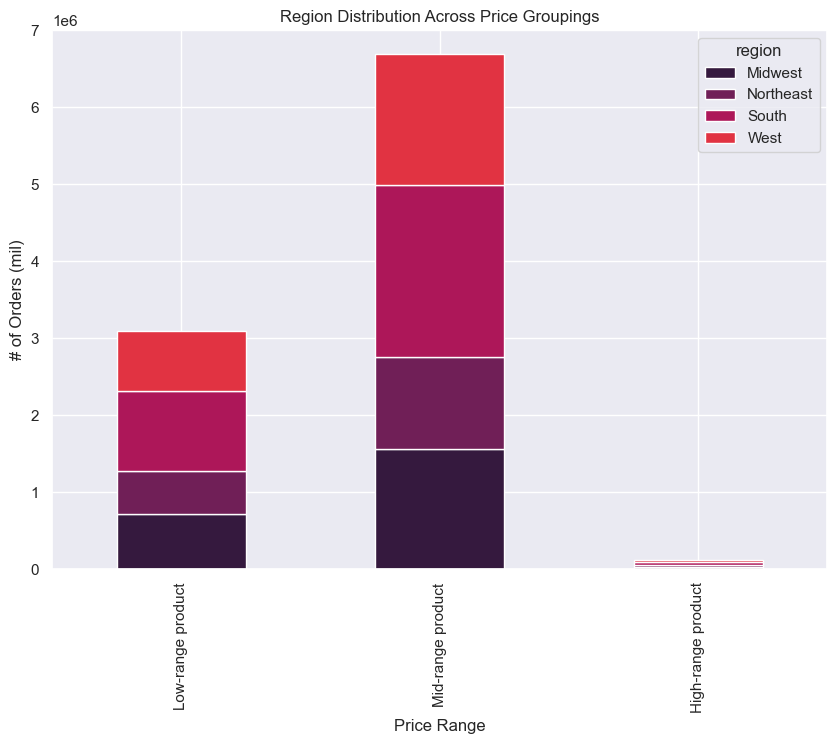

In [213]:
# Now create a stacked bar chart using Seaborn library. Set the theme
sns.set_theme()

# Pivot 'df_melted4' for easier plotting with matplotlib
df_pivot = df_melted4.pivot(index='price_label', columns='region', values='count')

# Create stacked bar chart
stackedbar_pricelabel_region = df_pivot.plot(kind='bar', stacked=True, figsize=(10, 7), color=sns.color_palette("rocket"))

# Customize the y-axis to range from 0 to 7,000,000 in increments of 1,000,000
plt.ylim(0, 7000000)
plt.yticks(range(0, 7000001, 1000000))

# Set axis labels and title
plt.xlabel('Price Range')
plt.ylabel('# of Orders (mil)')
plt.title('Region Distribution Across Price Groupings')

In [214]:
# Export stacked bar chart
stackedbar_pricelabel_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'stackedbar_pricelabel_region.png'))

#### Marketing team
#### Key Question 4: Are there certain types of products that are more popular than others? Which departments have the highest frequency of product orders?

#### Answer: Dairy eggs, Produce, Beverages make up the most revenue for Instacart. Produce, Dairy eggs, and Snacks are the most popular frequency of orders. 

#### Sales team
#### Key Question 5: What's the distribution among users in regards to their brand loyalty? 
#### How often do they return to Instacart? 

#### Answer: Conducted 'loyalty_flag' x 'days_since_prior_order' columns calculation from CF's Exercise 4.8
#### Aggregated this attribute to find mean 'days_since_prior_order' to confirm:
#### loyal (user orders above 40) orders= ~6 days average return to Instacart
#### regular (user orders 10-40) = ~12 days average return to Instacart
#### new (user order 10 or less) = ~16 days average return to Instacart


In [240]:
# Create a crosstab (pivot table) to count unique users per region vs. 'loyalty_flag' using .pd.crosstab() function
crosstab_loyalty_region = pd.crosstab(df_clean['region'], df_clean['loyalty_flag'], dropna = False)
crosstab_loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,731892,443185,1137044
Northeast,590581,328632,850647
South,1050345,635882,1638814
West,781461,490688,1239082


In [242]:
# Correct data preparation for seaborn bar chart with explicit column names
data = {
    'region': ['Midwest', 'Northeast', 'South', 'West'],
    'Loyal': [731892, 590581, 1050345, 781461],
    'New': [443185, 328632, 635882, 490688],
    'Regular': [1137044, 850647, 1638814, 1239082],
}

df_loyalty_region = pd.DataFrame(data)
print(df_loyalty_region)

      region    Loyal     New  Regular
0    Midwest   731892  443185  1137044
1  Northeast   590581  328632   850647
2      South  1050345  635882  1638814
3       West   781461  490688  1239082


In [247]:
# Melt the 'df_loyalty_region' from wide to long format. Long format is suitable for seaborn because it makes it easier to specify relationships between variable 
# Each observation forms a row; one column holds the variable names, another column holds the values
# id_vars = specifies that the region column should remain as is (it identifies the rows)
# var_name = sets the name of the new column that will hold the previous column names ('Loyal', '_').
# value_name = sets the name of the new column that will hold the values from the melted columns.

df_melted5 = pd.melt(df_loyalty_region, id_vars='region', var_name='loyalty_flag', value_name='count')

In [248]:
# Double-check that 'df_melted5' shows all possible results extracted from 'df_loyalty_region'
print(df_melted5)

       region loyalty_flag    count
0     Midwest        Loyal   731892
1   Northeast        Loyal   590581
2       South        Loyal  1050345
3        West        Loyal   781461
4     Midwest          New   443185
5   Northeast          New   328632
6       South          New   635882
7        West          New   490688
8     Midwest      Regular  1137044
9   Northeast      Regular   850647
10      South      Regular  1638814
11       West      Regular  1239082


Text(0.5, 1.0, 'Spending Habits Across 4 US Regions')

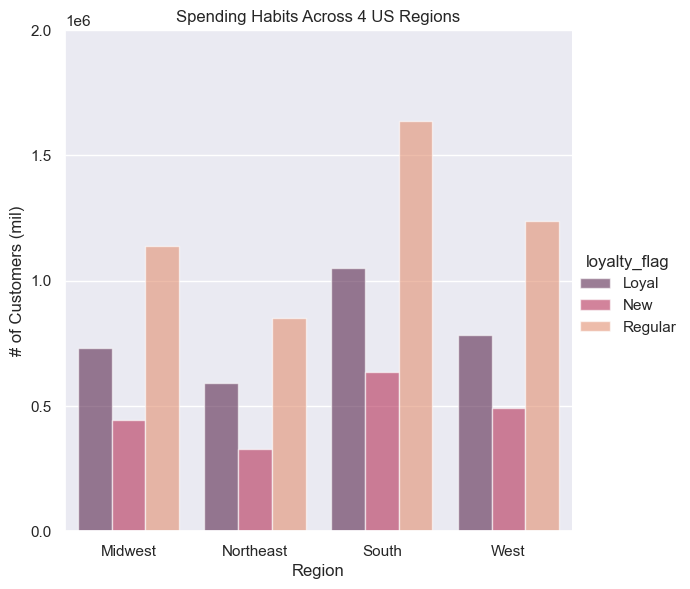

In [252]:
# Now create a bar chart using seaborn and 'df_melted5'. Set the theme
sns.set_theme()

# Create the bar chart
bar_region_loyalty = sns.catplot(
    data=df_melted5, kind="bar",
    x="region", y="count", hue="loyalty_flag", palette="rocket", alpha=.6, height=6
)

# Set the axis labels
bar_region_loyalty.set_axis_labels("Region", "# of Customers (mil)")

# Customize the y-axis to range from 0 to 2,000,000 in increments of 500,000
plt.ylim(0, 2000000)
plt.yticks(range(0, 2000001, 500000))

# Set the title
plt.title("Spending Habits Across 4 US Regions")

In [253]:
# Export bar chart
bar_region_loyalty.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_region_loyalty.png'))

#### Instacart Customer
#### Key Question 6: Are there differences in ordering habits based on a customer's loyalty status?

#### Answer:
#### Reference 5.3 Certain goods in the "department_id" column for Top 3 
#### Reference Bottom 3 categories bar chart showcasing a new customer is equally if not more likely to spend the same amount on alcohol as 'loyal customer' who already knows the Instacart brand. Marketing team should advertise alcohol delivery capabilities during "happy hour" times. Sales team should optimize on providing bundle deals and smooth checkout process for legal age adults (21+) to receive their purchases quickly so they can become 'regular' to then 'loyal'.


In [254]:
# Create a new subset dataframe called 'df_dept_bottom3' to drill in what is loyalty distribution in Bottom 3 departments
# Note that there are vague department names that only accounts for less than 1% of total Instacart data (Missing, Bulk, order)
# Drill in and analyze on other lower performing departments: pets (8), alcohol (5), international (6)

df_dept_bottom3 = df_dept_loyalty[df_dept_loyalty['department_id'].isin([8, 5, 6])]

Text(0.5, 1.0, 'Distribution of Customer Type in Bottom 3 Departments')

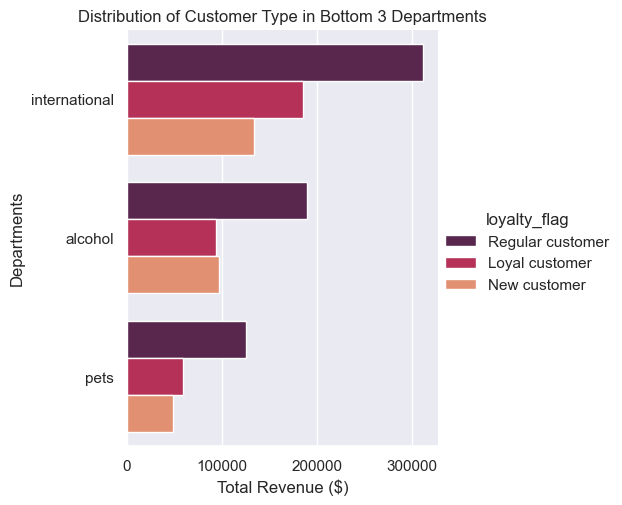

In [256]:
# Create a bar chart using 'df_dept_bottom3' as the data source
bar_bottom3 = sns.catplot(x='total_revenue', y='department' , data = df_dept_bottom3, kind='bar', hue='loyalty_flag', palette='rocket')
bar_bottom3.set_axis_labels("Total Revenue ($)", "Departments")
plt.title('Distribution of Customer Type in Bottom 3 Departments')

In [257]:
# Export bar chart
bar_bottom3.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_bottom3.png'))

#### Sales team
#### Key Question 7: Are there differences in ordering habits based on a customer's region?

#### Reference 3.
#### spender_flag calculation from CF's Exercise 4.8
#### low spender = average spend < 10
#### high spender = average spend 10+

## 10. Tidy up your script, export your final data set, and save your notebook.

In [3]:
# Export
df_clean.to_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'instacart_final.pkl'))